# Data 623 - Assignment 5

Assignment #5 is to use the International Stroke Trial dataset (https://datashare.is.ed.ac.uk/handle/10283/128) to answer one of the following:

 

1) Is there a difference in the outcome (i.e., acute ischemic stroke) between the aspirin and high heparin groups?

2) Compare the compliance between aspirin and high heparin groups and describe.

3) What are the characteristics of the patient groups (aspirin and high heparin)?

For this assignment, I will be focusing into finding the basic characteristics of the different groups (Question 3).

### Data Source:

The selected dataset is from the Internation Stroke Trial (IST) study, in which a prospective, randomised controlled trial was conducted from 1991 up to 1996. The aim of the study was to find a relation that could demonstrate the influence of early administration of aspirin, heparin, both or neither within the clinical course of acute ischaemic stroke.

The dataset consists of the diagnosis of 19,435 patients (instances) in which 126 variables are being measured, the variable names, as well as their definition, can be analyzed in the documentation of the folder of the dataset. Most of these variables provide information at an early outcome point (14-days after randomisation) and at 6-months and provide them as an analysable database.

For the purpose of this assignment, we will analyze the characteristics of two groups (aspirin and high heparin) at the momento of randomisation.


### Selected Variables:

In order to compare the two groups required for this assignment, we can divide the dataset into sub-datasets with the values of the following variables:

- RXASP - Refering to trial in which aspirin was allocated (Y/N)
- RXHEP - Refering to trial in which heparin was allocated (M/L/N) (M - Medium / L - Low)

For the generation of the groups, for the aspirin group the filtering of the dataset would be for patients in which we have a value for RXASP of Y and a value of RXHEP of N. For the High Heparin population, we want to filter for a value for RXASP of N and a RXHEP of H.

For the characteristics of the group within the randomisation data found in the dataset, I will be focusing on the following variables as they can be defined as general characteristics:

- RConsc - Conscious state at randomisation (F - Fully Alert, D - Drowsy, U- unconscious)
- Sex
- Age
- RSBP - Systolic blood pressure at randomisation
- RDEF1 - Face deficit (Y/N/C=can't assess)
- RDEF2 - Arm/hand deficit (Y/N/C=can't assess)
- RDEF3 - Leg/foot deficit (Y/N/C=can't assess)
- RDEF4 - Dysphasia (Y/N/C=can't assess)
- RDEF5 - Hemianopia (Y/N/C=can't assess)
- RDEF6 - Visuospatial disorder (Y/N/C=can't assess)
- RDEF7 - Brainstem/cerebellar signs (Y/N/C=can't assess)
- RDEF8 - Other deficit (Y/N/C=can't assess)
- STYPE - Stroke subtype (TACS/PACS/POCS/LACS/other
- RATRIAL - Atrial fibrillation (Y/N); not coded for pilot phase - 984 patients

In order to approach to the question, we will visualize the behavior of these variable and how they are defined within each of the groups requested in the assignment. For each visualization, we can make a conclusion about the values obtained throught the various plots.

In [61]:
# Import our needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import median
import matplotlib.patheffects as path_effects

In [62]:
# Import our dataset

ist = pd.read_csv('IST_corrected.csv', encoding = 'latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [63]:
# Let's select the needed variables

ist_char = ist[["RCONSC", "SEX", "AGE", "RSBP", "RDEF1", "RDEF2", "RDEF3", "RDEF4", "RDEF5", 
                "RDEF6", "RDEF7", "RDEF8", "STYPE", "RATRIAL", "RXASP", "RXHEP"]]

display(ist_char.head())

,RCONSC,SEX,AGE,RSBP,RDEF1,RDEF2,RDEF3,RDEF4,RDEF5,RDEF6,RDEF7,RDEF8,STYPE,RATRIAL,RXASP,RXHEP
0,D,M,69,140,N,N,N,Y,N,Y,N,Y,PACS,NaN,Y,N
1,F,M,76,150,Y,Y,Y,N,N,N,N,N,LACS,NaN,N,L
2,F,F,71,170,Y,Y,Y,N,N,N,N,N,LACS,NaN,Y,N
3,F,M,81,170,N,N,N,Y,N,N,N,N,PACS,NaN,N,H
4,F,M,78,170,Y,Y,Y,N,N,N,N,N,LACS,NaN,Y,H


In [64]:
# Let's divide the dataset by the two groups
ist_aspirin = ist_char[ist_char["RXASP"] == 'Y']
ist_aspirin = ist_aspirin[ist_aspirin['RXHEP'].isin(['N'])]

ist_heparin = ist_char[ist_char["RXASP"] == 'N']
ist_heparin = ist_heparin[ist_heparin['RXHEP'].isin(['H'])]

display(ist_aspirin.head())
display(ist_heparin.head())

,RCONSC,SEX,AGE,RSBP,RDEF1,RDEF2,RDEF3,RDEF4,RDEF5,RDEF6,RDEF7,RDEF8,STYPE,RATRIAL,RXASP,RXHEP
0,D,M,69,140,N,N,N,Y,N,Y,N,Y,PACS,NaN,Y,N
2,F,F,71,170,Y,Y,Y,N,N,N,N,N,LACS,NaN,Y,N
6,F,F,77,140,Y,Y,Y,N,N,N,Y,N,POCS,NaN,Y,N
13,F,F,86,190,N,N,N,N,N,N,N,Y,OTH,NaN,Y,N
18,D,M,66,140,Y,Y,Y,N,Y,Y,N,Y,TACS,NaN,Y,N


,RCONSC,SEX,AGE,RSBP,RDEF1,RDEF2,RDEF3,RDEF4,RDEF5,RDEF6,RDEF7,RDEF8,STYPE,RATRIAL,RXASP,RXHEP
3,F,M,81,170,N,N,N,Y,N,N,N,N,PACS,NaN,N,H
12,D,F,83,130,Y,Y,Y,Y,Y,N,N,N,TACS,NaN,N,H
17,F,M,63,150,Y,Y,Y,N,N,N,Y,N,POCS,NaN,N,H
25,F,M,47,118,Y,Y,Y,N,N,N,N,N,LACS,NaN,N,H
42,F,M,64,210,Y,Y,Y,Y,N,N,N,N,PACS,NaN,N,H


In [65]:
# Defining labels for future plots

ist_aspirin['Group'] = 'Aspirin'
ist_heparin['Group'] = 'High Heparin'

display(ist_aspirin.head())
display(ist_heparin.head())

,RCONSC,SEX,AGE,RSBP,RDEF1,RDEF2,RDEF3,RDEF4,RDEF5,RDEF6,RDEF7,RDEF8,STYPE,RATRIAL,RXASP,RXHEP,Group
0,D,M,69,140,N,N,N,Y,N,Y,N,Y,PACS,NaN,Y,N,Aspirin
2,F,F,71,170,Y,Y,Y,N,N,N,N,N,LACS,NaN,Y,N,Aspirin
6,F,F,77,140,Y,Y,Y,N,N,N,Y,N,POCS,NaN,Y,N,Aspirin
13,F,F,86,190,N,N,N,N,N,N,N,Y,OTH,NaN,Y,N,Aspirin
18,D,M,66,140,Y,Y,Y,N,Y,Y,N,Y,TACS,NaN,Y,N,Aspirin


,RCONSC,SEX,AGE,RSBP,RDEF1,RDEF2,RDEF3,RDEF4,RDEF5,RDEF6,RDEF7,RDEF8,STYPE,RATRIAL,RXASP,RXHEP,Group
3,F,M,81,170,N,N,N,Y,N,N,N,N,PACS,NaN,N,H,High Heparin
12,D,F,83,130,Y,Y,Y,Y,Y,N,N,N,TACS,NaN,N,H,High Heparin
17,F,M,63,150,Y,Y,Y,N,N,N,Y,N,POCS,NaN,N,H,High Heparin
25,F,M,47,118,Y,Y,Y,N,N,N,N,N,LACS,NaN,N,H,High Heparin
42,F,M,64,210,Y,Y,Y,Y,N,N,N,N,PACS,NaN,N,H,High Heparin


In [66]:
ist_final = ist_aspirin.append(ist_heparin, ignore_index=True)

display(ist_final.tail())

,RCONSC,SEX,AGE,RSBP,RDEF1,RDEF2,RDEF3,RDEF4,RDEF5,RDEF6,RDEF7,RDEF8,STYPE,RATRIAL,RXASP,RXHEP,Group
4975,F,F,68,180,N,Y,Y,N,Y,N,N,N,PACS,NaN,N,H,High Heparin
4976,F,F,64,170,Y,N,N,Y,N,N,N,N,PACS,NaN,N,H,High Heparin
4977,F,F,72,140,Y,Y,Y,Y,C,Y,Y,N,POCS,NaN,N,H,High Heparin
4978,F,M,74,145,N,N,N,Y,N,N,N,N,PACS,NaN,N,H,High Heparin
4979,F,F,76,160,N,N,N,N,N,N,Y,N,POCS,NaN,N,H,High Heparin


In [110]:
def add_median_labels(ax, precision='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{precision}}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

# Reference:
# https://stackoverflow.com/questions/38649501/labeling-boxplot-in-seaborn-with-median-value

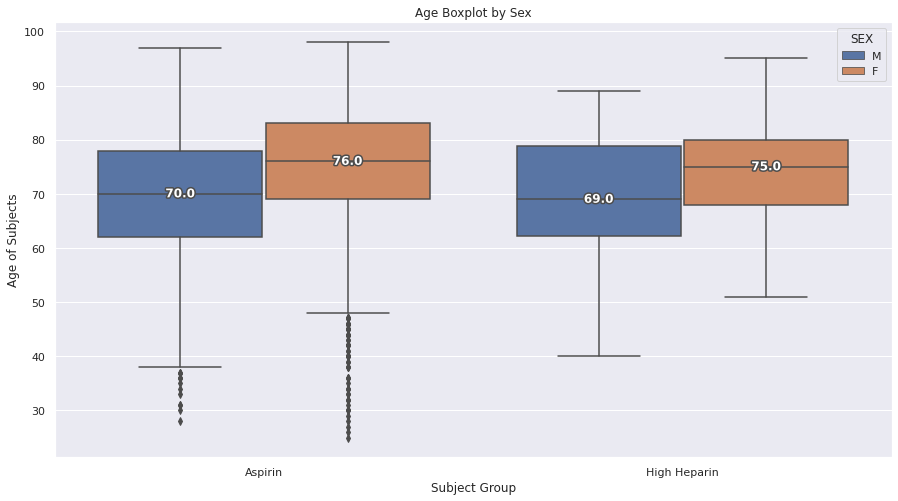

In [68]:
# Comparison of Age of the groups by sex category

sns.set_context('notebook')
sns.set_palette('colorblind')
sns.set_theme()

plt.figure(figsize=(15,8))
ax = sns.boxplot(x='Group', y="AGE", hue="SEX", data=ist_final)  
ax.set(xlabel='Subject Group', ylabel='Age of Subjects', title='Age Boxplot by Sex')  

add_median_labels(ax)
plt.show()

From what we can see in terms of the age of both groups, we can observe that they are almost with the same median for both their male and female populations. We can observe that there are higher maximum values within the Aspirin group, as well as a few outliers in the range of the minimum values for that same group.

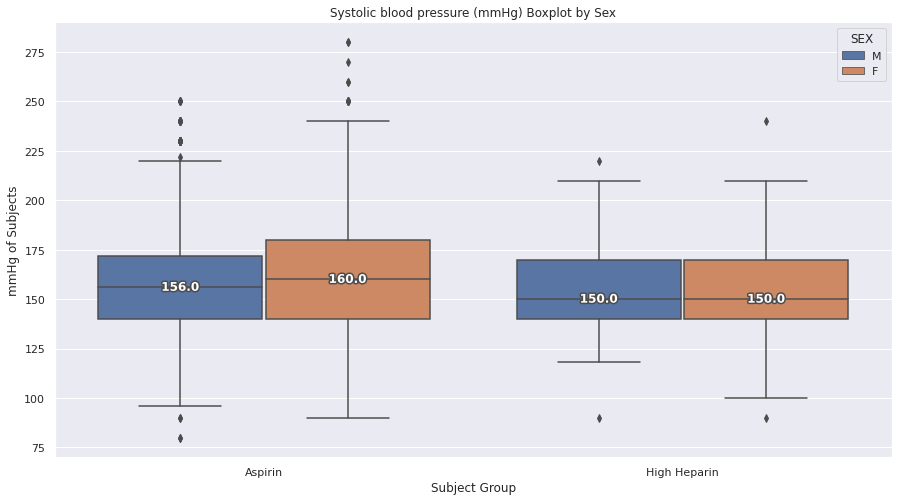

In [69]:
# Comparison of Systolic Blood Pressure of the groups by sex category

sns.set_context('notebook')
sns.set_palette('colorblind')
sns.set_theme()

plt.figure(figsize=(15,8))
ax = sns.boxplot(x='Group', y="RSBP", hue="SEX", data=ist_final)  
ax.set(xlabel='Subject Group', ylabel='mmHg of Subjects', title='Systolic blood pressure (mmHg) Boxplot by Sex')

medians = ist_final.groupby(['Group'])['RSBP'].median()
vertical_offset = ist_final['RSBP'].median() * 0.05 # offset from median for display

add_median_labels(ax)

plt.show()

In the aspect of the systolic blood pressure, we can also see that the median values within the groups are within the same range. We can see that the range from minimum to maximum values are wider in the Aspirin group than in the High Heparin group (Going from values below 100 mmHg, up to almost 250 mmHg). 

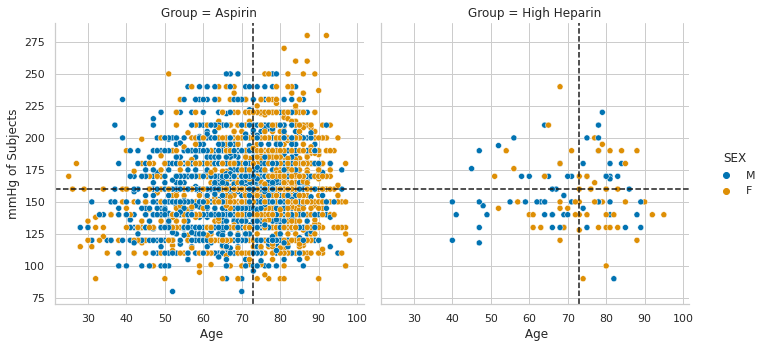

In [70]:
# Scatterplot of the relation between age and systolic blood pressure among the groups population

sns.set_context('notebook')
sns.set_palette('colorblind')
sns.set_style('whitegrid')

medianBlood=ist_final['RSBP'].median()
medianAge=ist_final['AGE'].median()

g = sns.relplot(
    data=ist_final, x="AGE", y="RSBP", hue='SEX', col='Group', col_wrap=2)

g.map(plt.axhline, y=medianBlood, color="k", linestyle='--')
g.map(plt.axvline, x=medianAge, color="k", linestyle='--')
g.set(xlabel=' Age', ylabel='mmHg of Subjects')

Within the previous scatterplot, we can see the distribution of the subjects in the two groups defined previously in the "Data Source" section of the assignment. It's clear that there seems to be a disproportionate distribution of the subjects in these two groups, it's clear there are more subjects in the "Aspirin" group than in the "High Heparin" group.

On the Aspirin Group, we can see that the distribution of female subjects are, their majority, above the median of the age of all the subjects (Which seems to be around 70).

Even with the points mentioned before, we can see that the subjects within each of the groups, are evenly distributed through the above and below values for "Age" and "Systolic Blood Pressure".

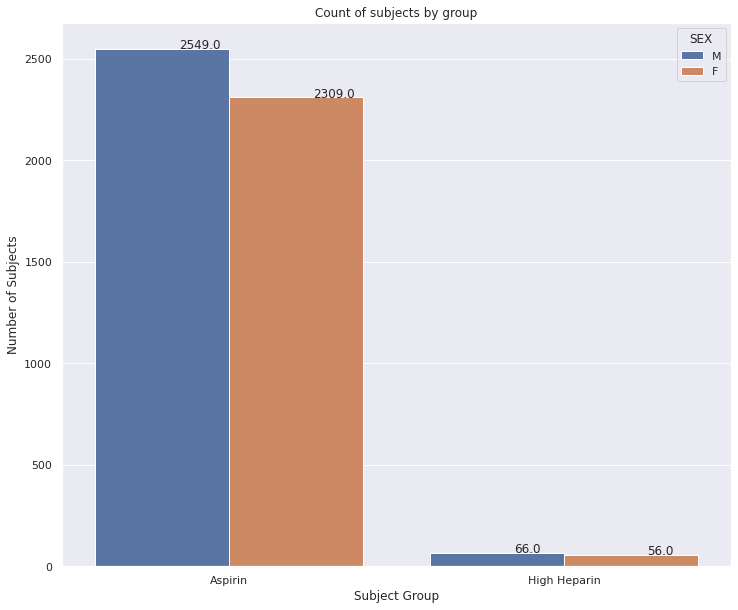

In [71]:
# Population of the groups by sex.

sns.set_context('notebook')
sns.set_palette('colorblind')
sns.set_theme()

plt.figure(figsize=(12,10))
ax = sns.countplot(x="Group", hue="SEX", data=ist_final)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax.set(xlabel='Subject Group', ylabel='Number of Subjects', title='Count of subjects by group') 
plt.show()

In this plot we can see the population by sex of the two groups. We can see there's a population of 2549 male subjects and 2309 female subjects for the group that had Aspirin in the trial for a total of 4858 subjects, and 66 male subjects and 56 female subjects that were in the group of "High Heparin" for a total of 122 subjects.

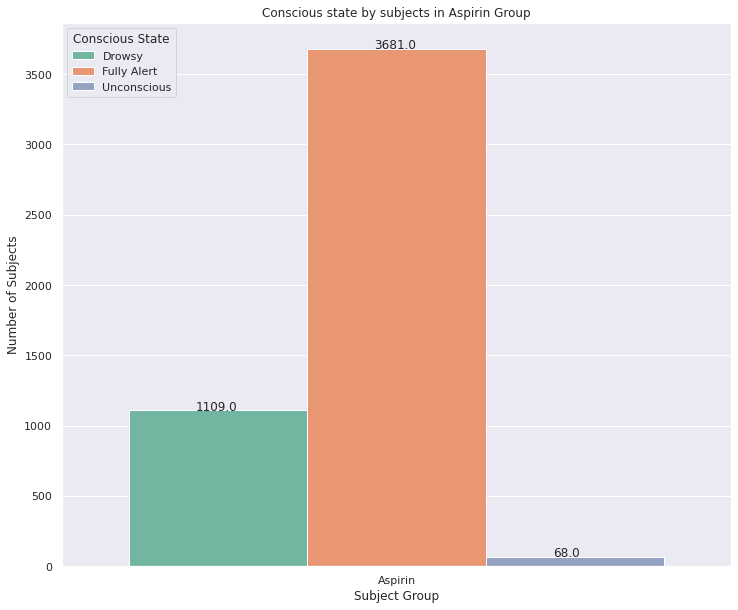

In [72]:
# Distribution of Conscious state at randomisation for each group
# For the aspirin Group

sns.set_context('notebook')
sns.set_palette('colorblind')
sns.set_theme()

plt.figure(figsize=(12,10))
ax = sns.countplot(x="Group", hue="RCONSC", data=ist_aspirin, palette = "Set2")

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+0.01),)

ax.set(xlabel='Subject Group', ylabel='Number of Subjects', title='Conscious state by subjects in Aspirin Group') 

plt.legend(title='Conscious State', loc='upper left', labels=['Drowsy', 'Fully Alert', 'Unconscious'])
plt.show()

On the Aspirin group, we can see that almost all of the subjects (3681) were fully alert at the time of the randomisation of the study. From that, 1109 were drowsy and only 68 subjects were fully unconscious.

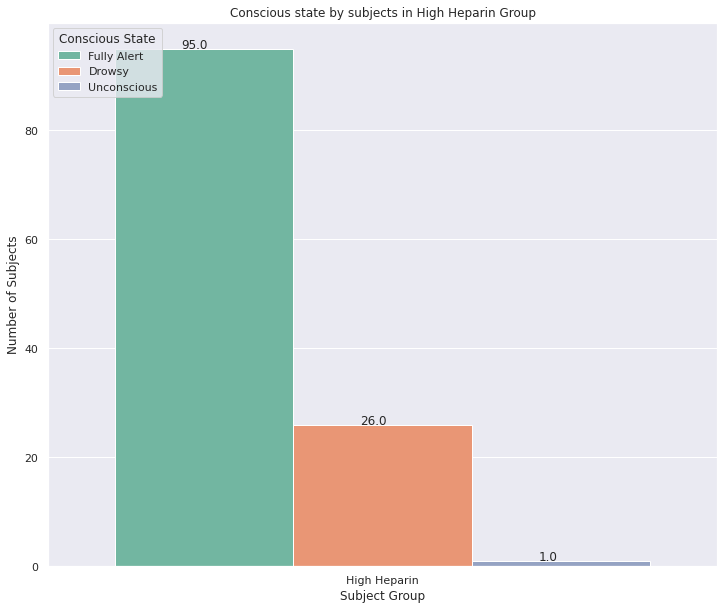

In [73]:
# Distribution of Conscious state at randomisation for each group
# For the High Heparin Group

sns.set_context('notebook')
sns.set_palette('colorblind')
sns.set_theme()

plt.figure(figsize=(12,10))
ax = sns.countplot(x="Group", hue="RCONSC", data=ist_heparin, palette = "Set2")

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+0.01))

ax.set(xlabel='Subject Group', ylabel='Number of Subjects', title='Conscious state by subjects in High Heparin Group') 

plt.legend(title='Conscious State', loc='upper left', labels=['Fully Alert', 'Drowsy', 'Unconscious'])
plt.show()

As well as on the Aspirin group, we can see that in the High Heparin group there's the same pattern for the conscious state of the subjects. The majority of the subjects in the High Heparin group (95) were Fully alert at the randomisation of the study. With 26 subjects being in a Drowsy state, and only 1 subject being fully unconscious.

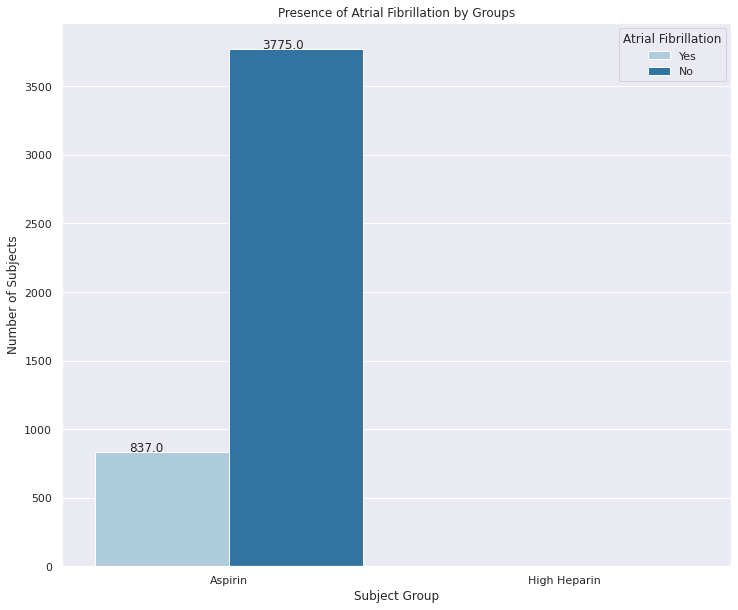

In [74]:
# Presence of Atrial Fibrillation between the two groups

sns.set_context('notebook')
sns.set_palette('colorblind')
sns.set_theme()

plt.figure(figsize=(12,10))
ax = sns.countplot(x="Group", hue="RATRIAL", data=ist_final, palette = "Paired")

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+0.01))

ax.set(xlabel='Subject Group', ylabel='Number of Subjects', title='Presence of Atrial Fibrillation by Groups') 

plt.legend(title='Atrial Fibrillation', loc='upper right', labels=['Yes', 'No'])
plt.show()

From the previous plot, we can see that through the filterting realized to get the subjects that had a high dose of Heparin for the randomisation, we picked subjects which were missing information regarding if the had an atrial fibrillation or not. 

From the Aspirin group, we can see that only 837 of the 4612 subjects that had information about fibrillation, actually presented atrial fibrillation, which is about 18% of the group that had information about fibrillation.

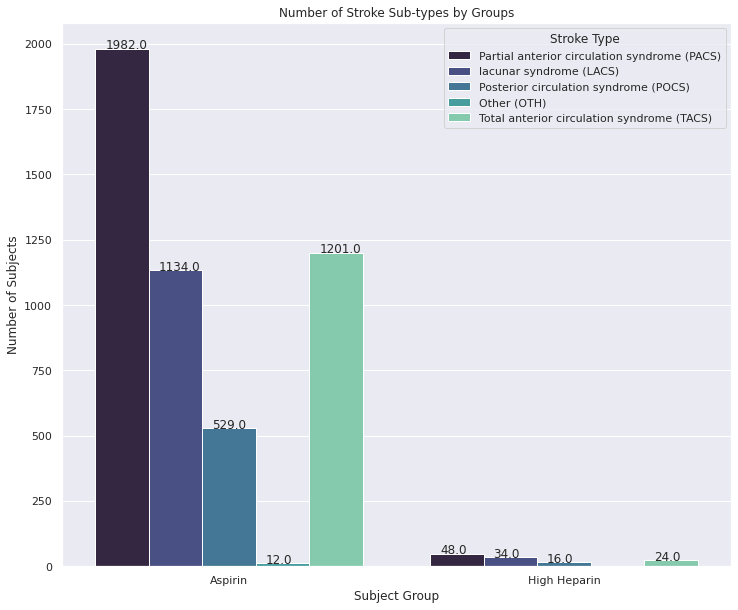

In [75]:
# Distribution of the Stroke type of the subjects

sns.set_context('notebook')
sns.set_palette('colorblind')
sns.set_theme()

plt.figure(figsize=(12,10))
ax = sns.countplot(x="Group", hue="STYPE", data=ist_final, palette = "mako")

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+0.01))

ax.set(xlabel='Subject Group', ylabel='Number of Subjects', title='Number of Stroke Sub-types by Groups') 

plt.legend(title='Stroke Type', loc='upper right', labels=['Partial anterior circulation syndrome (PACS)', 'lacunar syndrome (LACS)',
                                                           'Posterior circulation syndrome (POCS)', 'Other (OTH)', 'Total anterior circulation syndrome (TACS)'])
plt.show()

In terms of the presence of stroke types, we can analyze that both groups have primarily presence of partial anterior circulation syndrom (PACS). We can define the list of the most frequent stroke sub-types by each group in the following list:

For the Aspirin Group:
- PACS
- Total anterior circulation syndrome
- Lacunar syndrome
- Posterior circulation syndrome
- Other

For the High Heparin Group:
- PACS
- Lacunar syndrome
- Total anterior circulation syndrome
- Posterior circulation syndrome
- Other

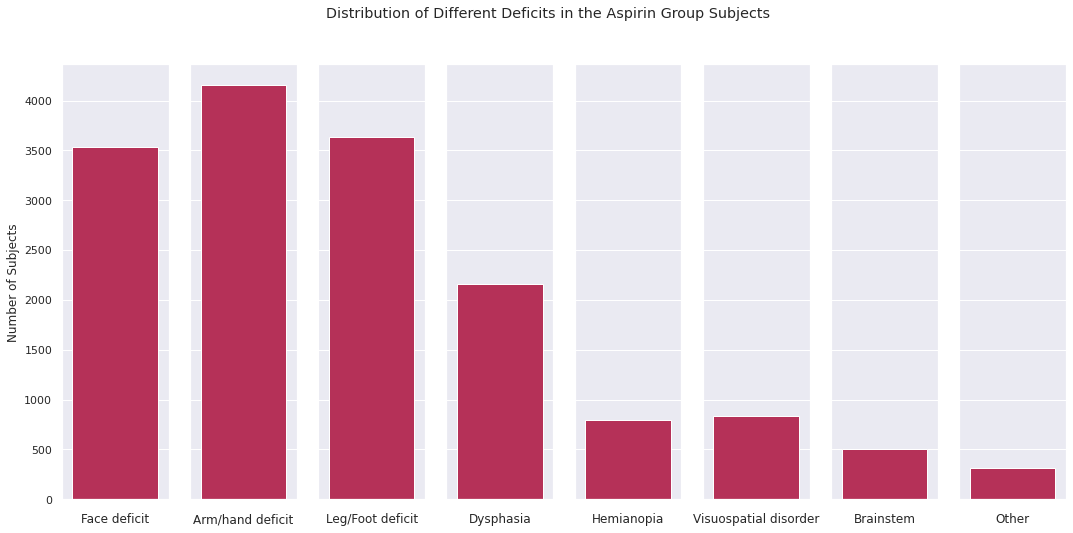

In [108]:
# Distribution of the Different Deficit present within the subjects of the study.
# For the Aspirin Group

sns.set_context('notebook')
sns.set_palette('colorblind')
sns.set(style="darkgrid")

fig, ax =plt.subplots(1,8,figsize=(18,8), sharey=True)

ist_aspiring_y1 = ist_aspirin[ist_aspirin["RDEF1"] == 'Y']
ist_aspiring_y2 = ist_aspirin[ist_aspirin["RDEF2"] == 'Y']
ist_aspiring_y3 = ist_aspirin[ist_aspirin["RDEF3"] == 'Y']
ist_aspiring_y4 = ist_aspirin[ist_aspirin["RDEF4"] == 'Y']
ist_aspiring_y5 = ist_aspirin[ist_aspirin["RDEF5"] == 'Y']
ist_aspiring_y6 = ist_aspirin[ist_aspirin["RDEF6"] == 'Y']
ist_aspiring_y7 = ist_aspirin[ist_aspirin["RDEF7"] == 'Y']
ist_aspiring_y8 = ist_aspirin[ist_aspirin["RDEF8"] == 'Y']

FACE = sns.countplot(x="RDEF1", data=ist_aspiring_y1, palette = "rocket", ax=ax[0])
ARM_HAND = sns.countplot(x="RDEF2", data=ist_aspiring_y2, palette = "rocket", ax=ax[1])
LEG_FOOT = sns.countplot(x="RDEF3", data=ist_aspiring_y3, palette = "rocket", ax=ax[2])
DYSP = sns.countplot(x="RDEF4", data=ist_aspiring_y4, palette = "rocket", ax=ax[3])
HEMI = sns.countplot(x="RDEF5", data=ist_aspiring_y5, palette = "rocket", ax=ax[4])
VIS = sns.countplot(x="RDEF6", data=ist_aspiring_y6, palette = "rocket", ax=ax[5])
BRAIN = sns.countplot(x="RDEF7", data=ist_aspiring_y7, palette = "rocket", ax=ax[6])
OTH = sns.countplot(x="RDEF8", data=ist_aspiring_y8, palette = "rocket", ax=ax[7])

FACE.set(xlabel='Face deficit', ylabel='Number of Subjects', xticklabels=[])
ARM_HAND.set(xlabel='Arm/hand deficit', ylabel='', xticklabels=[])
LEG_FOOT.set(xlabel='Leg/Foot deficit', ylabel='', xticklabels=[])
DYSP.set(xlabel='Dysphasia', ylabel='', xticklabels=[])
HEMI.set(xlabel='Hemianopia', ylabel='', xticklabels=[])
VIS.set(xlabel='Visuospatial disorder', ylabel='', xticklabels=[])
BRAIN.set(xlabel='Brainstem', ylabel='', xticklabels=[])
OTH.set(xlabel='Other', ylabel='', xticklabels=[])


plt.suptitle('Distribution of Different Deficits in the Aspirin Group Subjects')
plt.show()

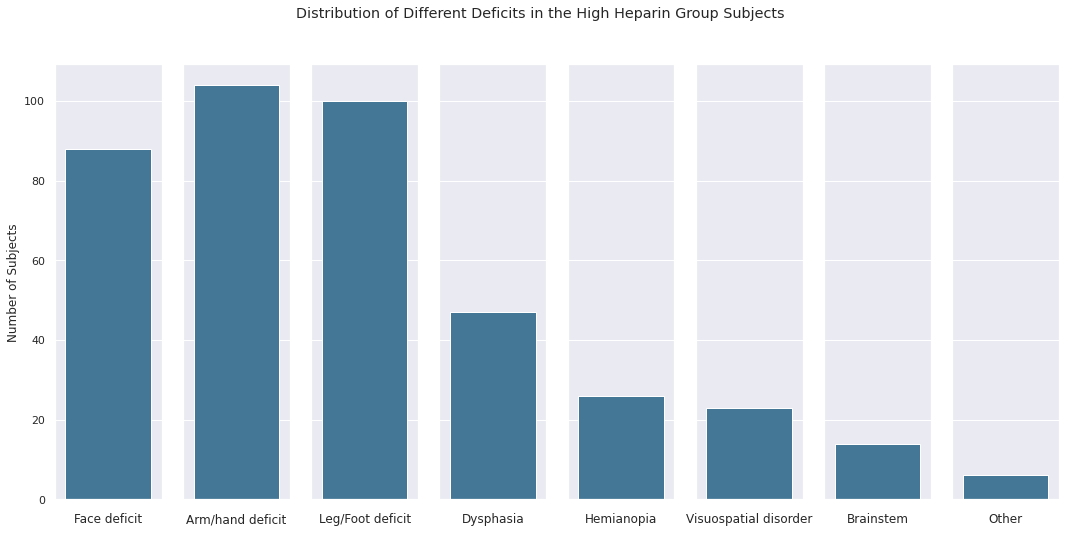

In [109]:
# Distribution of the Different Deficit present within the subjects of the study.
# For the High Heparin Group

sns.set_context('notebook')
sns.set_palette('colorblind')
sns.set(style="darkgrid")

fig, ax =plt.subplots(1,8,figsize=(18,8), sharey=True)

ist_heparin_y1 = ist_heparin[ist_heparin["RDEF1"] == 'Y']
ist_heparin_y2 = ist_heparin[ist_heparin["RDEF2"] == 'Y']
ist_heparin_y3 = ist_heparin[ist_heparin["RDEF3"] == 'Y']
ist_heparin_y4 = ist_heparin[ist_heparin["RDEF4"] == 'Y']
ist_heparin_y5 = ist_heparin[ist_heparin["RDEF5"] == 'Y']
ist_heparin_y6 = ist_heparin[ist_heparin["RDEF6"] == 'Y']
ist_heparin_y7 = ist_heparin[ist_heparin["RDEF7"] == 'Y']
ist_heparin_y8 = ist_heparin[ist_heparin["RDEF8"] == 'Y']

FACE = sns.countplot(x="RDEF1", data=ist_heparin_y1, palette = "mako", ax=ax[0])
ARM_HAND = sns.countplot(x="RDEF2", data=ist_heparin_y2, palette = "mako", ax=ax[1])
LEG_FOOT = sns.countplot(x="RDEF3", data=ist_heparin_y3, palette = "mako", ax=ax[2])
DYSP = sns.countplot(x="RDEF4", data=ist_heparin_y4, palette = "mako", ax=ax[3])
HEMI = sns.countplot(x="RDEF5", data=ist_heparin_y5, palette = "mako", ax=ax[4])
VIS = sns.countplot(x="RDEF6", data=ist_heparin_y6, palette = "mako", ax=ax[5])
BRAIN = sns.countplot(x="RDEF7", data=ist_heparin_y7, palette = "mako", ax=ax[6])
OTH = sns.countplot(x="RDEF8", data=ist_heparin_y8, palette = "mako", ax=ax[7])

FACE.set(xlabel='Face deficit', ylabel='Number of Subjects', xticklabels=[])
ARM_HAND.set(xlabel='Arm/hand deficit', ylabel='', xticklabels=[])
LEG_FOOT.set(xlabel='Leg/Foot deficit', ylabel='', xticklabels=[])
DYSP.set(xlabel='Dysphasia', ylabel='', xticklabels=[])
HEMI.set(xlabel='Hemianopia', ylabel='', xticklabels=[])
VIS.set(xlabel='Visuospatial disorder', ylabel='', xticklabels=[])
BRAIN.set(xlabel='Brainstem', ylabel='', xticklabels=[])
OTH.set(xlabel='Other', ylabel='', xticklabels=[])


plt.suptitle('Distribution of Different Deficits in the High Heparin Group Subjects')
plt.show()

Now observing the last variables to analyze in terms of charactersitics, we can see that both groups share the most common deficits within their population. In both groups the deficits that predominate in the subjects are:

- Arm/hand deficit
- Leg/foot deficit
- Face Deficit

### Summary of the Groups - Characteristics

With all the previous plots and graphical demonstrations, we can summarize that both groups share a decent quantity of common characteristics. From which we can define the following points:

- The range of the age of the subjects in both groups is not that different, they go from a range between 40 to 95, with medians around 70 to 75.
- In terms of the systolic blood pressure, we can also note that the range is similar between the two groups, with a median around 150 to 155. With the difference that in the aspirin groups we can see minimum values below the 100 mmHG up to maximum values almost reaching the 250 mmHg.
- Regarding the distribution of the male and female population of the groups, we can see that there are more population for the Aspirin group than in the High Heparin group. Another aspect is that in both groups, the subjects are evenly distributed within the medians of the Age and Systolic Pressure values, except for the female population in the aspirin group, in which seems that the majority of the female population is within a range above the median of the Age.
- In both groups, there seems that the population is evenly distributed by sex, with a small majority being on the "male" population.
- Most of the subjects in both groups were fully alert at the moment of the randomisation. Just a few of the subjects were drowsy, and almost no one was fully unconscious at the moment of the randomisation.
- There was no data for the pressence of atrial fibrillation in the group of the High Heparin population. For the Aspirin group, we can see that only around 18% of the population that had information about fibrillation, actually presented an atrial fibrillation at the moment of randomisation.
- In both groups, the most common subtype of stroke was Partial anterior circulation syndrome (PACS).
- In both groups, the most common deficits presented in the subjects were Arm/Hand, Leg/Foot and Face deficits.